In [15]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv(filepath_or_buffer="hypertension_dataset.csv")
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
954,49,4.8,1,Hypertension,7.2,22.9,Beta Blocker,Yes,Low,Non-Smoker,Yes
794,83,7.1,0,Normal,5.2,22.7,Diuretic,No,Low,Smoker,No
657,64,6.2,10,Normal,6.5,27.3,NaN,Yes,Moderate,Non-Smoker,Yes
553,76,9.4,7,Normal,6.7,29.8,NaN,Yes,Low,Non-Smoker,No
1587,61,10.8,6,Prehypertension,5.7,19.7,NaN,Yes,Moderate,Non-Smoker,Yes


In [ ]:
df["Has_Hypertension"] = df["Has_Hypertension"].map({"Yes": 1, "No": 0})

df["Smoking_Status"] = df["Smoking_Status"].map({"Smoker": 1, "Non-Smoker": 0})

df["Family_History"] = df["Family_History"].map({"Yes": 1, "No": 0})

df["Exercise_Level"] = df["Exercise_Level"].map({"High": 1, "Moderate": 0.5, "Low": 0})


df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,0.0,6.4,25.8,NaN,1,0.0,0,1
1,32,11.7,10,0.0,5.4,23.4,NaN,0,0.0,0,0
2,78,9.5,3,0.0,7.1,18.7,NaN,0,0.5,0,0
3,38,10.0,10,1.0,4.2,22.1,ACE Inhibitor,0,0.0,0,1
4,41,9.8,1,0.7,5.8,16.2,Other,0,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1980,56,10.2,0,0.0,6.5,25.0,Diuretic,1,0.0,0,1
1981,29,8.9,4,1.0,6.9,16.9,NaN,1,1.0,0,1
1982,64,5.9,9,0.0,5.6,18.9,ACE Inhibitor,1,0.5,0,1
1983,35,7.4,8,0.7,8.2,29.2,NaN,1,0.5,0,0


<Axes: >

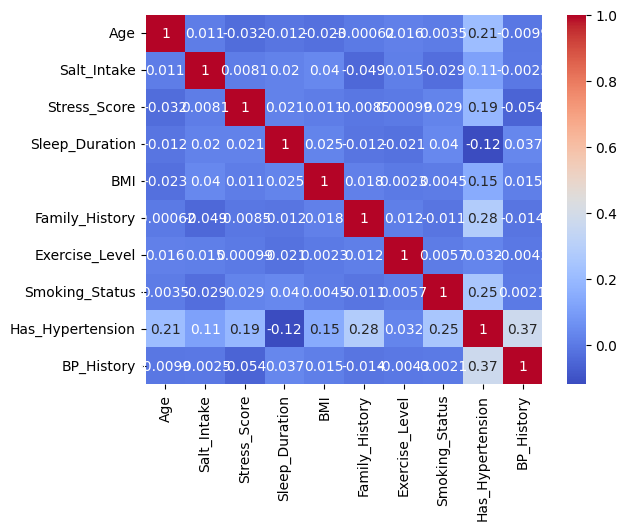

In [18]:
corr = df[["Age", "Salt_Intake", "Stress_Score", "Sleep_Duration", "BMI", "Family_History", "Exercise_Level", "Smoking_Status", "Has_Hypertension", "BP_History"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [19]:
from scipy.stats import pearsonr

# Select relevant columns for correlation
cols = ["Age", "Salt_Intake", "Stress_Score", "Sleep_Duration", "BMI", "Family_History", "Exercise_Level", "Smoking_Status", "BP_History"]
p_values = {}

for col in cols:
    corr_coef, p_val = pearsonr(df[col], df["Has_Hypertension"])
    p_values[col] = p_val

p_values

{'Age': np.float64(2.3749228070962438e-21),
 'Salt_Intake': np.float64(3.202256247205077e-07),
 'Stress_Score': np.float64(4.606186673608247e-17),
 'Sleep_Duration': np.float64(9.159721544768037e-08),
 'BMI': np.float64(8.31956549370882e-11),
 'Family_History': np.float64(1.203667711644084e-37),
 'Exercise_Level': np.float64(0.15572351674186455),
 'Smoking_Status': np.float64(5.347534195675991e-30),
 'BP_History': np.float64(8.013560703202571e-67)}

In [20]:
# Features and target
X = df[cols]
y = df["Has_Hypertension"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       192
           1       0.79      0.81      0.80       205

    accuracy                           0.79       397
   macro avg       0.79      0.79      0.79       397
weighted avg       0.79      0.79      0.79       397



In [21]:
# Fit random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       192
           1       0.98      0.97      0.97       205

    accuracy                           0.97       397
   macro avg       0.97      0.97      0.97       397
weighted avg       0.97      0.97      0.97       397

